In [4]:
# Cell 0: Ensure dependencies for this notebook kernel
# Installs packages into the kernel environment (use %pip to target the kernel)
%pip install -r ../requirements.txt --quiet
print("Installed/verified packages from ../requirements.txt")

Note: you may need to restart the kernel to use updated packages.
Installed/verified packages from ../requirements.txt



[notice] A new release of pip available: 22.3.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Cell 1: Setup
"""
Interactive EDA Notebook for Fraud Detection
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
# Cell 2: Load Data
df = pd.read_csv('../data/raw/transactions.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (100000, 11)


,step,type,amount,name_orig,old_balance_org,new_balance_org,name_dest,old_balance_dest,new_balance_dest,is_fraud,is_flagged_fraud
0,103,TRANSFER,105580.76,C996662,109840.39,4259.63,C157392,20301.14,125881.90,0,0
1,436,PAYMENT,18121.30,C599921,297837.92,279716.62,C422803,205051.05,223172.35,0,0
2,271,CASH_IN,15177.04,C807147,44835.41,29658.37,C605523,111579.24,126756.28,0,0
3,107,CASH_OUT,13741.86,C152067,31447.45,17705.59,C995929,89251.65,102993.51,0,0
4,72,TRANSFER,25033.62,C730735,25343.91,310.29,C311930,35459.25,60492.87,0,0


In [3]:
# Cell 3: Basic Info
print("="*50)
print("DATASET INFO")
print("="*50)
print(df.info())
print("\n")
print(df.describe())

DATASET INFO
<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              100000 non-null  int64  
 1   type              100000 non-null  str    
 2   amount            100000 non-null  float64
 3   name_orig         100000 non-null  str    
 4   old_balance_org   100000 non-null  float64
 5   new_balance_org   100000 non-null  float64
 6   name_dest         100000 non-null  str    
 7   old_balance_dest  100000 non-null  float64
 8   new_balance_dest  100000 non-null  float64
 9   is_fraud          100000 non-null  int64  
 10  is_flagged_fraud  100000 non-null  int64  
dtypes: float64(5), int64(3), str(3)
memory usage: 10.4 MB
None


               step         amount  old_balance_org  new_balance_org  \
count  100000.00000  100000.000000     1.000000e+05     1.000000e+05   
mean      371.46312   50237.062397     9.967091e+04   

In [4]:
print("="*50)
print("TARGET DISTRIBUTION")
print("="*50)
print(df['is_fraud'].value_counts())
print(f"\nFraud Percentage: {df['is_fraud'].mean()*100:.2f}%")

TARGET DISTRIBUTION
is_fraud
0    98500
1     1500
Name: count, dtype: int64

Fraud Percentage: 1.50%


Saved plot to: reports/eda/fraud_distribution.png


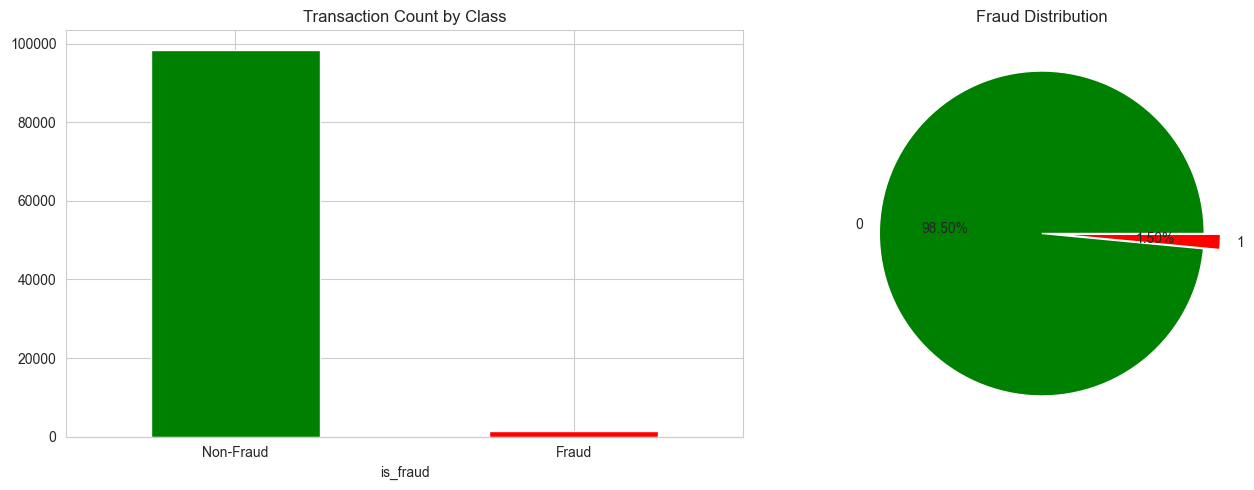

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Count Plot
df['is_fraud'].value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Transaction Count by Class')
axes[0].set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)
# Pie Chart
counts = df['is_fraud'].value_counts()
counts.plot(kind='pie', ax=axes[1], autopct='%1.2f%%',
            colors=['green', 'red'], explode=[0, 0.1])
axes[1].set_title('Fraud Distribution')

# Save figure before showing to avoid backends clearing the canvas
os.makedirs('reports/eda', exist_ok=True)
fig_path = 'reports/eda/fraud_distribution.png'
plt.tight_layout()
plt.savefig(fig_path, dpi=150, bbox_inches='tight')
print(f"Saved plot to: {fig_path}")
plt.show()

In [10]:
# Cell 6: Amount Analysis
print("="*50)
print("AMOUNT ANALYSIS")
print("="*50)

fraud_df = df[df['is_fraud'] == 1]
non_fraud_df = df[df['is_fraud'] == 0]

print(f"Fraud Amount - Mean: ${fraud_df['amount'].mean():,.2f}, Median: ${fraud_df['amount'].median():,.2f}")
print(f"Non-Fraud Amount - Mean: ${non_fraud_df['amount'].mean():,.2f}, Median: ${non_fraud_df['amount'].median():,.2f}")

AMOUNT ANALYSIS
Fraud Amount - Mean: $50,845.72, Median: $34,427.37
Non-Fraud Amount - Mean: $50,227.79, Median: $34,764.06


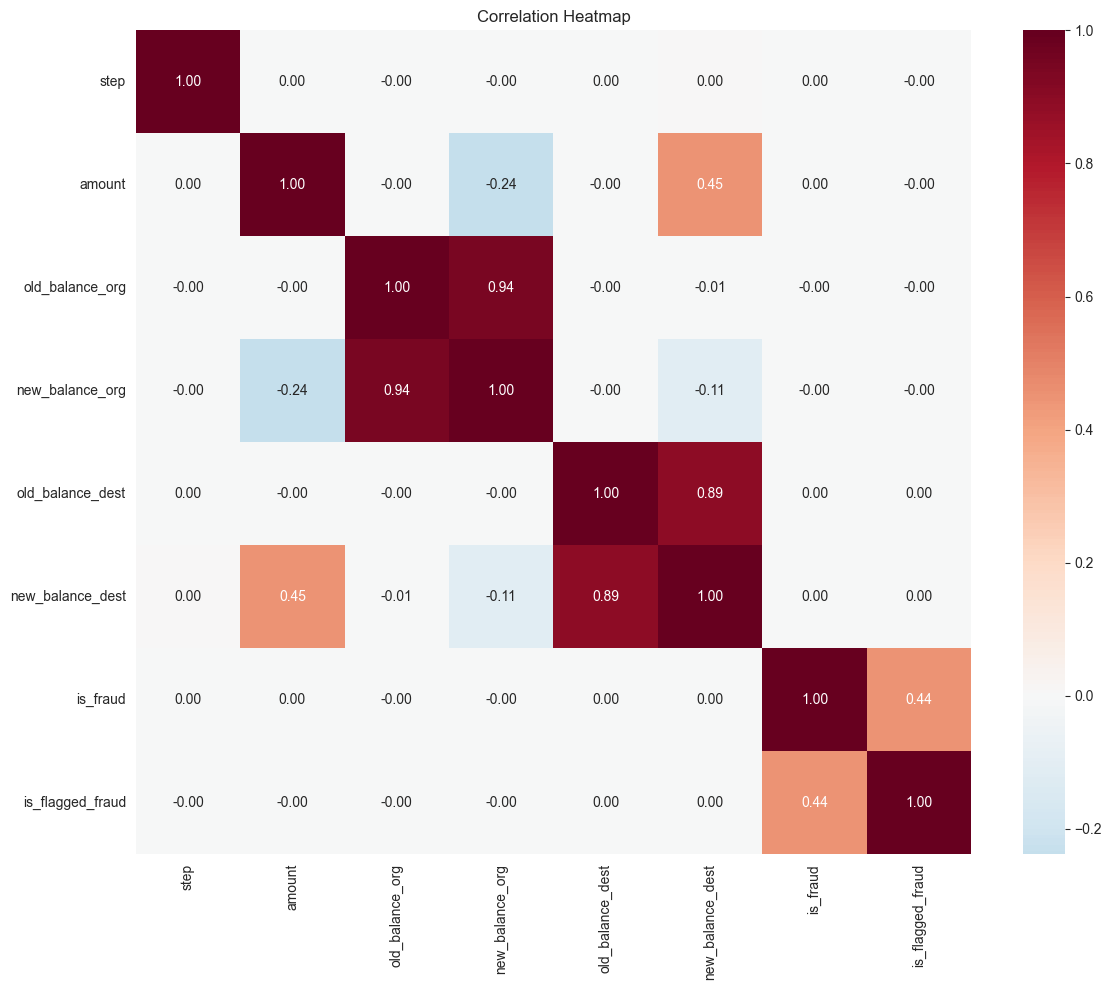

In [11]:
# Cell 7: Correlation Heatmap
plt.figure(figsize=(12, 10))
numerical_df = df.select_dtypes(include=[np.number])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f', cmap='RdBu_r', center=0)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [12]:
# Cell 8: Fraud by Transaction Type
if 'type' in df.columns:
    fraud_by_type = df.groupby('type')['is_fraud'].agg(['sum', 'count', 'mean'])
    fraud_by_type.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    fraud_by_type['Fraud_Rate'] = (fraud_by_type['Fraud_Rate'] * 100).round(2)
    print(fraud_by_type.sort_values('Fraud_Rate', ascending=False))

          Fraud_Count  Total  Fraud_Rate
type                                    
PAYMENT           550  34951        1.57
DEBIT             151  10207        1.48
CASH_IN           146   9932        1.47
CASH_OUT          293  19899        1.47
TRANSFER          360  25011        1.44
